# (1) Create dataset (make_blobs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

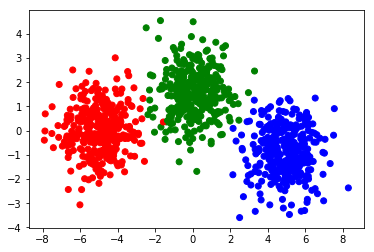

In [2]:
centers = [[-5, 0], [0, 1.5], [5, -1]]
# make_blobs(n_samples, centers[, random_state])
x,y = make_blobs(n_samples=1000,centers=centers, random_state=40)
color='rgb'
color= [color[y[i]] for i in range(len(y))]
plt.scatter(x[:,0],x[:,1],c=color)
plt.show()

# (2) Training and Testing data Split  
把資料集切分成training data跟testing data

In [3]:
from sklearn.model_selection import train_test_split
#製造X=維度10x5,值為0-49的矩陣
#製造y=0-9的一維矩陣
X, y = np.arange(50).reshape(10,5), np.arange(10)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42, shuffle=True)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[35 36 37 38 39]
 [10 11 12 13 14]
 [45 46 47 48 49]
 [20 21 22 23 24]
 [15 16 17 18 19]
 [30 31 32 33 34]]
[[40 41 42 43 44]
 [ 5  6  7  8  9]
 [25 26 27 28 29]
 [ 0  1  2  3  4]]
[7 2 9 4 3 6]
[8 1 5 0]


# (3) data normalization
資料各維度因為尺度, 單位不同, 導致影響, 需要做normalization
- Z-Score scale  
轉成標準常態分佈,平均值為0, 標準差為1
- Maxmin Scale  
將最大設為1, 最小設為0

```python
from sklearn import preprocessing
```

In [4]:
#z-score
# a是3筆4維資料
a = np.array([[10, 2.7, 3.6, 5],
              [-100, 5, -2, 10],
              [120, 20, 40, 50]], dtype=np.float64)

scale_a = preprocessing.scale(a, axis=0)
print(scale_a.std(axis=0))
print(scale_a.mean(axis=0))

NameError: name 'preprocessing' is not defined

In [ ]:
scale_a = preprocessing.minmax_scale(a, axis=0, feature_range=(0,1)) #default feature range 0~1
print(scale_a)

****
### 標準化範例

In [ ]:
# make_classification產生n_samples=300筆資料, n_classes=2表示y輸出2個類別
# 每筆資料n_features=2維度為2, n_informative=2有用的維度有2個, n_redundant=0表示redundant維度0個
# n_clusters_per_class表示每個class中的clusters數量
# shift=0,scale=100表示將資料先偏移shift再乘上scale倍數放大
from sklearn.datasets.samples_generator import make_classification 
# 製作兩個feature的分類資料
X, y = make_classification(
    n_samples=300, n_classes=2, n_features=2,
    n_redundant=0, n_informative=2, 
    random_state=22, n_clusters_per_class=1, 
    shift=0,scale=100)
print(X.shape)
# 將資料可視化
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# import svm classifier
from sklearn.svm import SVC
X, y = make_classification(
    n_samples=300, n_classes=2, n_features=2,
    n_redundant=0, n_informative=2, 
    random_state=22, n_clusters_per_class=1, 
    shift=0,scale=100)
#將資料分成訓練及測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
model = SVC(gamma='auto')
# 訓練model
model.fit(X_train, y_train)
# 用model預測整個資料集X
prediction = model.predict(X)
# model.score(測試集, 測試集label)可以回傳accuracy
print('accuracy before normalization:%.2f'%model.score(X_test, y_test))
# 畫出原始資料
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Actual')
plt.xlabel('X1')
plt.ylabel('X2')
# 畫出預測結果
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.title('Prediction')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#將資料做z-score normalization
X, y = make_classification(
    n_samples=300, n_classes=2, n_features=2,
    n_redundant=0, n_informative=2, 
    random_state=22, n_clusters_per_class=1, 
    shift=0,scale=100)
X = preprocessing.scale(X, axis=0)
#將資料分成訓練及測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# import svm classifier
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X)
print('accuracy after normalization:%.2f'%model.score(X_test, y_test))
# 畫出原始資料
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Actual')
plt.xlabel('X1')
plt.ylabel('X2')
# 畫出預測結果
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.title('Prediction')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# (4.1) Label Encoder
sklearn.preprocessing的LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

encX = LabelEncoder()
encX.fit(['看電視','讀書','音樂','游泳'])
ency = LabelEncoder()
ency.fit(['是', '否'])
#製作df
data_Xy = {'興趣':['看電視','讀書','音樂','看電視'],'成功與否':['是','否','否','是']}
df = pd.DataFrame(data = data_Xy, index=['小明','小林','小英','小陳'])
df = df[['興趣','成功與否']]
print(df)
#
print(encX.transform(df['興趣']))

df_encode = df.copy()
df_encode['興趣'] = encX.transform(df_encode['興趣'])
df_encode['成功與否'] = ency.transform(df_encode['成功與否'])

df_encode

In [ ]:
prediction = np.array([1,0,0,1])
#將encoder反解
df['prediction'] = ency.inverse_transform(prediction) 
df

# (4.2) Label Encoder (Map)
有時候需要手動指定類別的值, 例如S/M/L/XL有強弱之分, 直接用MAP

In [ ]:
import pandas as pd
import numpy as np
#
size_mapping = {'S':0, 'M':1, 'L':2, 'XL':3} #define map as dictionary
label_mapping = {'否':0, '是':1} #define map as dictionary

data_Xy = {'衣服size':['XL','S','M','L'],'成功與否':['是','否','否','是']}
df = pd.DataFrame(data = data_Xy, index=['小明','小林','小英','小陳'])
df = df[['衣服size','成功與否']]
df

In [ ]:
df_encode = df.copy()
df_encode['衣服size'] = df_encode['衣服size'].map(size_mapping)
df_encode['成功與否'] = df_encode['成功與否'].map(label_mapping)
df_encode

# (4.3) Label Encoder (Map)
類別的值沒有大小之分時, 用one-hot encoding  
原本有類別標籤有看電視, 讀書, 音樂3種  
分成 [是否看電視, 是否讀書, 是否音樂] 3個維度

In [ ]:
import pandas as pd
import numpy as np
data_Xy = {'興趣':['看電視','讀書','音樂','看電視'],'成功與否':['是','否','否','是']}
df = pd.DataFrame(data = data_Xy, index=['小明','小林','小英','小陳'])
df = df[['興趣','成功與否']]
df

In [ ]:
# df.iloc[:,0]表示第0維[興趣], 有看電視, 讀書, 音樂3種, 所以會分成3個維度
X = pd.get_dummies(df.iloc[:,0]) #針對第一個欄位做get_dummies
X

# (5) Model Evaluation
- MAE: Mean Absolute Error  
缺點: 沒有標準化, 不好判定值是大是小  
缺點: 離群值會影響MAE(因為離群值的|誤差|會大於正常值)  
- MSE: Mean Square Error  
缺點: 沒有標準化, 不好判定值是大是小  
缺點: 離群值會影響MAE(因為離群值的$(誤差)^2$會遠遠大於正常值)  
- $R^2$ Score: Coefficient of determination  
$R^2(y,\hat{y}) = 1 - \frac{\sum(y_i-\hat{y_i})^2}{\sum{(y_i - \overline y)^2}}$
- F1-score: 
$2\frac{1}{\frac{1}{recall}+\frac{1}{precision}}$  
recall= $\frac{TP}{FN+TP}$  
precision= $\frac{TP}{TP+FP}$  

| * | Predict Neg | Predict Pos |
|---|----- | ----- |
|True Neg| TN | FP |
|True Pos | FN | TP |


- Accuracy:  
$\frac{TF+TP}{TN+FN+TP+FP}$

```python
from sklearn import metrics
```

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [ ]:
# 產生 n_samples筆資料, 資料X的維度n_features, 輸出y的維度有n_targets, noise越大資料越散開
X, y = datasets.make_regression(n_samples=100,n_features=1,n_targets=1, random_state = 42, noise = 20)
plt.scatter(X,y)
model = LinearRegression()
# Train model
model.fit(X, y)
# Predict X
prediction = model.predict(X)
# draw
plt.scatter(X,prediction)
plt.show()

In [ ]:
def linear_prediction(plot_dict):
    for noise in plot_dict:
        X, y = datasets.make_regression(n_features=1, random_state = 42, noise = noise)
        model = LinearRegression()
        model.fit(X, y)
        prediction = model.predict(X)
        # y is true label
        mae = metrics.mean_absolute_error(prediction, y)
        mse = metrics.mean_squared_error(prediction, y)
        r2 = metrics.r2_score(prediction, y)
        plt.subplot(plot_dict[noise])
        plt.xlabel('prediction')
        plt.ylabel('actual')
        plt.tight_layout()
        plt.plot(prediction, y,'.')
        plt.title('Plot for noise: %d'%noise + '\n' + 'mae:%.2f'%mae
                 + '\n' + 'mse:%.2f'%mse
                 + '\n' + 'r2:%.2f'%r2)
    plt.show()
# 141 use for subplot 1x4 and index 1
# 142 use for subplot 1x4 and index 2
plot_dict = {1:141, 9:142, 18:143, 1000:144}
linear_prediction(plot_dict)

In [ ]:
# 手寫辨識

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

digits = load_digits()
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

actual = y_test

In [ ]:
# assume we already got predicted
predicted = np.array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7, 8,
       4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7, 1, 0,
       7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9, 2, 6, 9,
       1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2, 8, 9,
       3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7, 3, 4, 8, 9, 7,
       9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9, 9, 5, 9, 9, 5, 7,
       5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6,
       7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 9, 6, 3,
       0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3,
       3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1,
       6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3,
       7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2,
       6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2,
       9, 0, 6, 7, 2, 0, 9, 6, 0, 4, 2, 0, 7, 9, 8, 5, 7, 8, 2, 8, 4, 3, 7,
       2, 6, 9, 9, 5, 1, 0, 8, 2, 8, 9, 5, 6, 2, 2, 7, 2, 1, 5, 1, 6, 4, 5,
       0, 9, 4, 1, 1, 7, 0, 8, 9, 0, 5, 4, 3, 8, 8, 6, 5, 3, 4, 4, 4, 8, 8,
       7, 0, 9, 6, 3, 5, 2, 3, 0, 8, 8, 3, 1, 3, 3, 0, 0, 4, 6, 0, 7, 7, 6,
       2, 0, 4, 4, 2, 3, 7, 1, 9, 8, 6, 8, 5, 6, 2, 2, 3, 1, 7, 7, 8, 0, 3,
       3, 2, 1, 5, 5, 9, 1, 3, 7, 0, 0, 3, 0, 4, 5, 8, 3, 3, 4, 3, 1, 8, 9,
       8, 3, 6, 3, 1, 6, 2, 1, 7, 5, 5, 1, 9])

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    # subplot 8x8
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow( X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == actual[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

# Quantitative Measurement on the Performance
在分類問題上，所有的模型評估方法基本上都可以由confusion matrix得出來。  
在y方向也就是row方向代表的就是actual 0~9，  
x方向代表也就是column方向代表的是predicted 0~9。 
```
actual/predicted       0  1  2  3  4  5  6  7  8   9
         0          [[37  0  0  0  0  0  0  0  0  0]
         1           [ 0 40  0  0  0  0  1  0  1  1]
         2           [ 0  0 42  2  0  0  0  0  0  0]
         3           [ 0  0  0 44  0  0  0  0  1  0]
         4           [ 0  0  0  0 37  0  0  1  0  0]
         5           [ 0  0  0  0  0 46  0  0  0  2]
         6           [ 0  1  0  0  0  0 51  0  0  0]
         7           [ 0  0  0  1  1  0  0 46  0  0]
         8           [ 0  3  1  0  0  0  0  0 44  0]
         9           [ 0  0  0  0  0  1  0  0  2 44]]
         ```

In [ ]:
from sklearn import metrics
# 可以用metrics.confusion_matrix列出
print(metrics.confusion_matrix(actual, predicted))

In [ ]:
# metrics.accuracy_score計算accuracy
print('accuracy:%.3f'%(metrics.accuracy_score(actual, predicted)))

### Precision Recall & F1-score
使用metrics.classification_report  
support 43表示有43個1分對了0.91也就是約40個分對

In [ ]:
print(metrics.classification_report(actual, predicted)) 